# 7. Visualizing distribution of data

데이터 분석이나 모델링에서 가장 우선되어야 하는 것은 '변수의 분포'를 이해하는 것이다. 데이터의 분포를 시각화함으로써 이에 대한 해답을 얻을 수 있다. 

* axes-level functions: histplot(), kdeplot(), ecdfplot(), rugplot()
* figure-level functions: displot(), jointplot(), pairplot()

분포를 시각화 하는 방법은 여러가지가 있고, 각각 장단점이 존재한다. 목적에 맞게 적합한 접근 방식을 선택하는 것이 중요.

## Plotting univariate histograms

histogram: 분포를 시각화하는 가장 일반적인 접근 방식

displot()의 기본값. 히스토그램은 데이터 변수의 축을 불연속의 구간으로 나누고 각 구간에 속하는 값의 개수를 해당 막대 높이로 표현.

In [2]:
import seaborn as sns

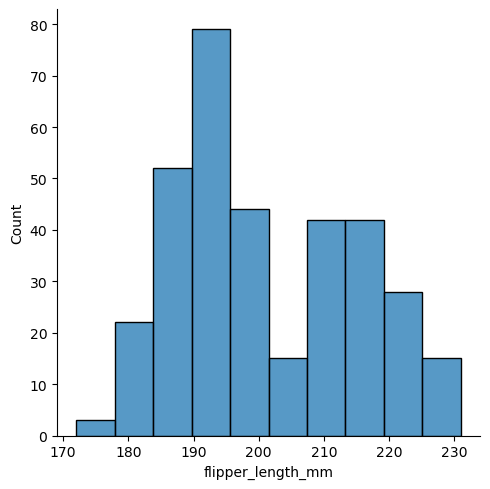

In [3]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

## Choosing the bin size

구간의 크기 

기본적으로 displot()과 histplot()은 데이터의 분산과 관측 횟수를 기준으로 기본 구간 크기를 선택. 크기를 조절하기 위해서는 'binwidth parameter'를 조절

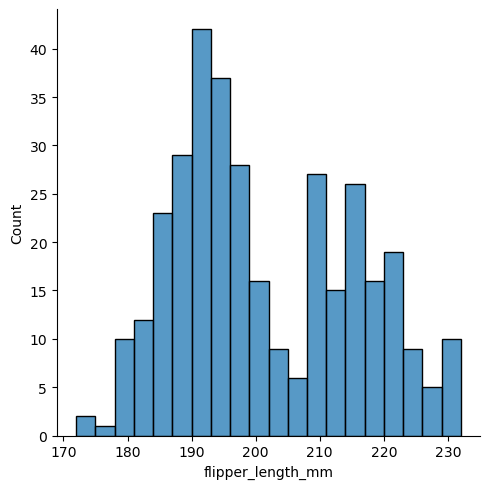

In [4]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)


'bins'를 설정하는 것도 가능

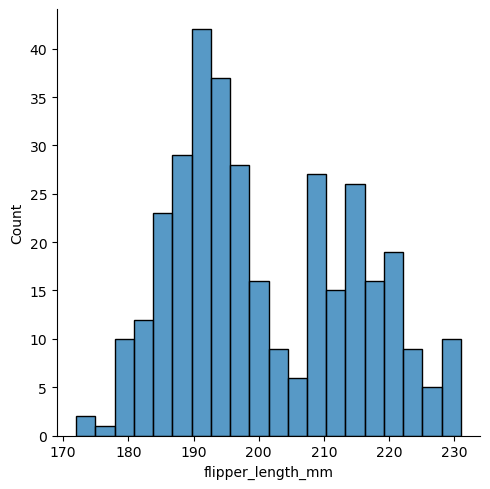

In [5]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

변수가 비교적 적은 값으로 구성된 경우, 기본 구간의 크기가 작아 분포가 적절히 나타나지 않을 수 있다.

잘못된 예:

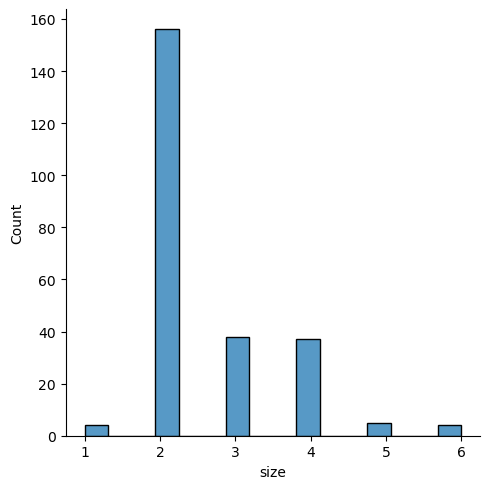

In [6]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

이럴 때는 직접 bins를 설정해줄 수 있다. 

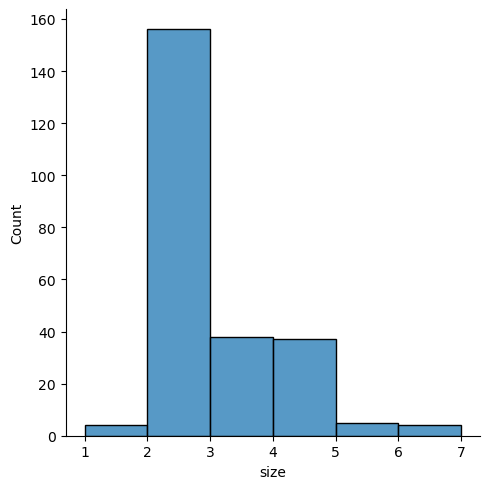

In [7]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

이는 'discrete=True' 설정을 통해서도 구현 가능하다. 

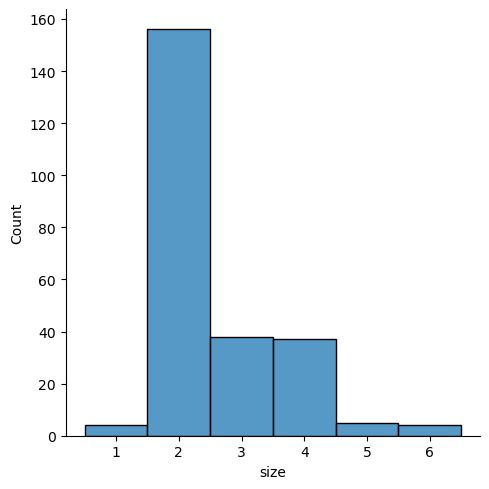

In [8]:
sns.displot(tips, x="size", discrete=True)

또한, 히스토그램의 논리를 활용하여 범주형 변수의 분포를 시각화할 수도 있다. 범주형 변수의 경우 축의 구간이 자동으로 설정되지만, 축의 범주적 특성을 강조하기 위해 막대를 축소(shrink)하는 것이 도움이 될 수 있다.

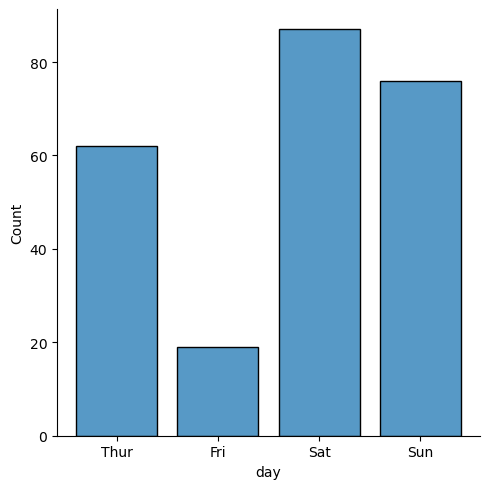

In [9]:
sns.displot(tips, x="day", shrink=.8)

## Conditioning on other variables

변수의 분포를 이해했다면, 다음 단계는 그 분포가 같은 데이터 셋 내의 다른 변수와 다른지 확인하는 것이다.

'hue'에 변수를 할당하면 각각의 변수에 대해 별도의 히스토그램이 그려지고 색상으로 구분된다.

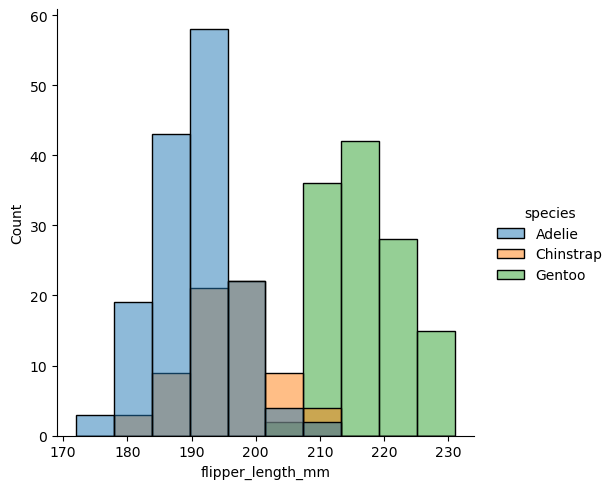

In [10]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

기본적으로, 서로 다른 히스토그램들은 겹쳐서 표현된다. 구별하기 어려운 경우에는 element='step' 을 통해 히스토그램의 시각화 방식을 바꿀 수 있다. 

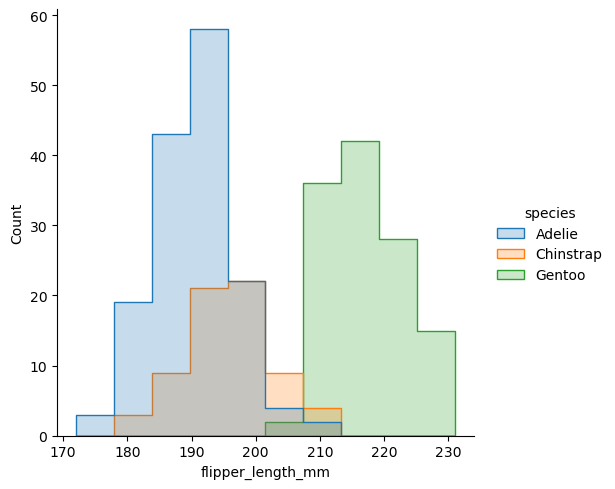

In [11]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

또한, 그래프를 겹쳐 그리는 대신, multiple='stack' 을 통해 각 구간의 히스토그램을 쌓아서 나타낼 수 있다. 

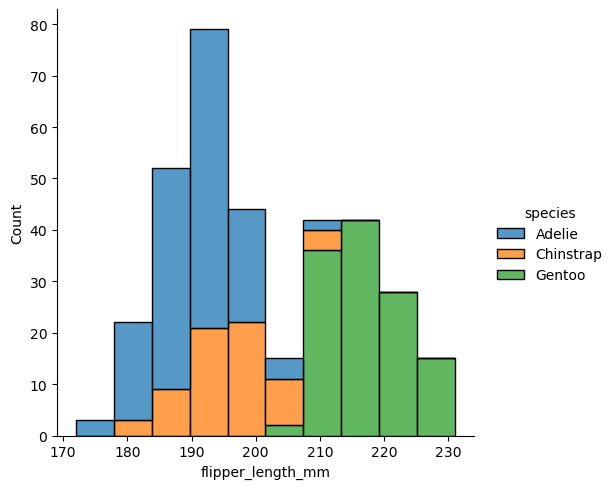

In [12]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

누적으로 히스토그램을 그리면 변수의 특징을 놓칠 수 있다. 또 다른 방법으로는 막대를 가로 방향으로 줄이는 'dodge' 파라미터를 이용하는 것이 있다. 그러나 범주형 변수의 level 수가 적은 경우에만 적합하다.

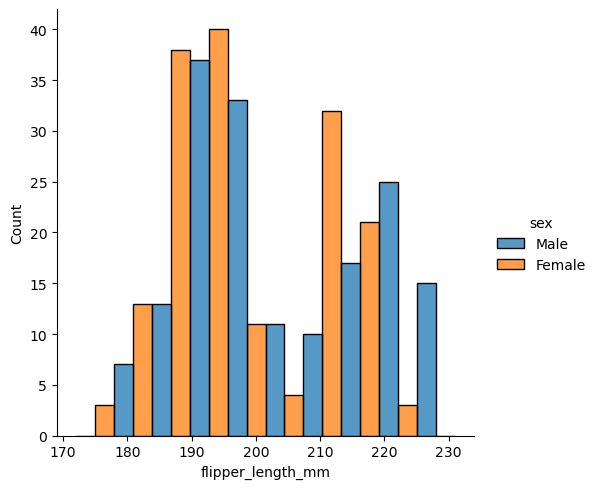

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

displot()은 figure-level function이고, facetgrid에 그려지기 때문에 각각의 분포를 별도의 subplot에 나타낼 수 있다. 

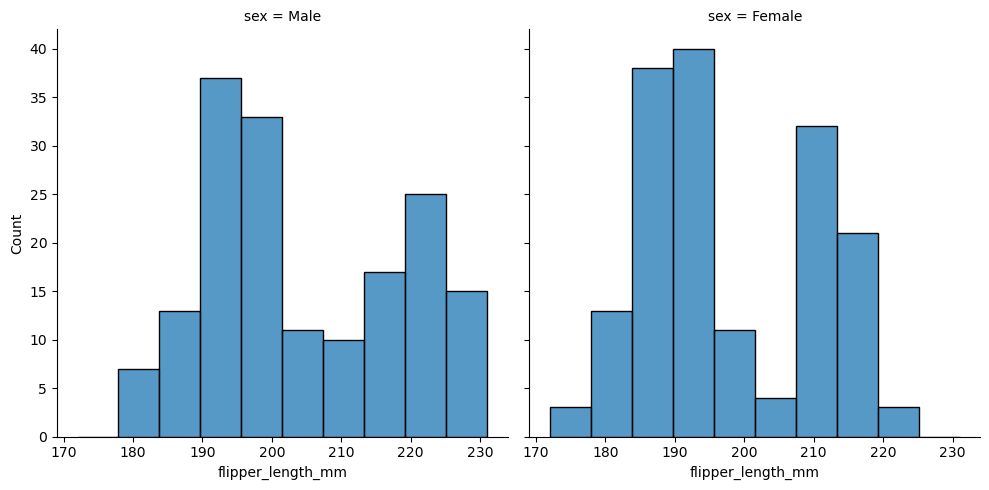

In [14]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

## Normalized histogram statistics

Subset들의 관측값의 수가 서로 다른 경우, 개수 측면에서 분포를 비교하는 것은 바람직하지 않다. 이런 경우에는 stat 매개변수를 사용하여 count를 정규화해야한다.

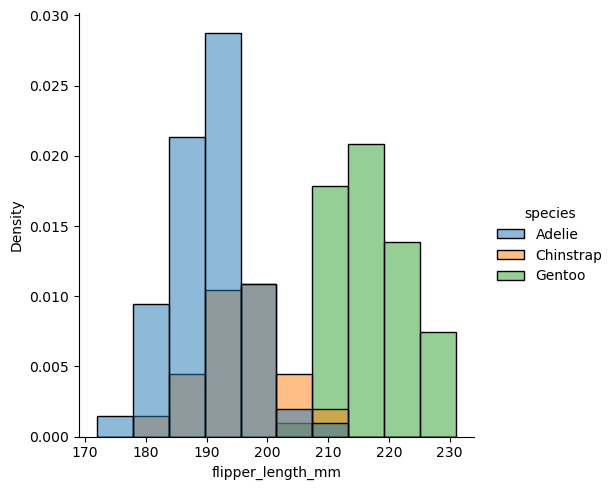

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

그러나 기본적으로 정규화는 모든 분포에 적용된다. 그러므로 이것은 쉽게 막대의 높이를 조정할 수 있다. 'common_norm=False'를 통해 각각의 subset들을 독립적으로 정규화할 수 있다. 

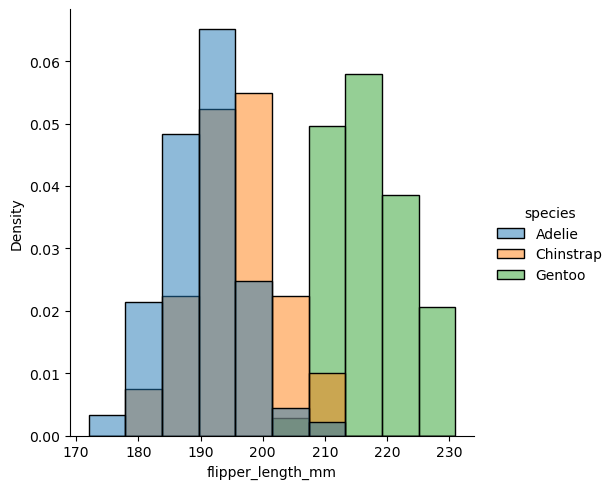

In [16]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

밀도 정규화는 막대를 측정하여 그들의 영역의 합이 1이되게 한다. 결과적으로 밀도 축을 직접 해석할 수 없게 된다. 또 다른 옵션은 막대의 높이가 1이 되도록 정규화하는 것이다. 이 옵션은 변수가 불연속형인 경우에 가장 적합하지만 모든 히스토그램에 사용할 수 있다. 

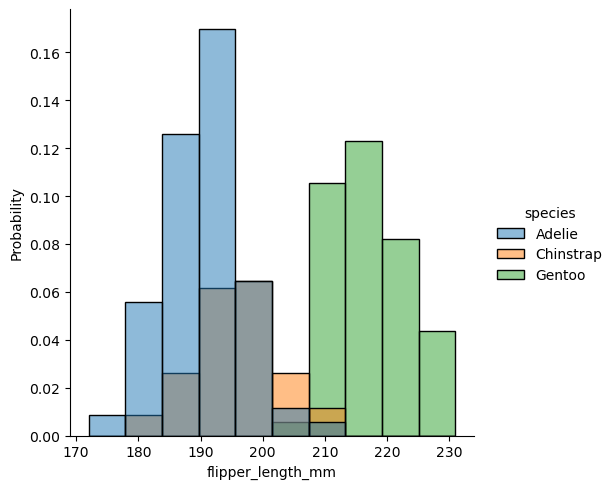

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")